# Cross-validation

**L'apprentissage automatique est un processus itératif.**

Vous serez confronté à des choix concernant les variables prédictives à utiliser, les types de modèles à utiliser, les arguments à fournir à ces modèles, etc. Jusqu'à présent, vous avez fait ces choix en fonction des données en mesurant la qualité du modèle avec une validation ( ou holdout) défini.

Mais il y a quelques inconvénients à cette approche. Pour voir cela, imaginez que vous avez un jeu de données avec 5000 lignes. Vous conserverez généralement environ 20 % des données en tant qu'ensemble de données de validation, soit 1 000 lignes. Mais cela laisse une certaine chance au hasard dans la détermination des scores du modèle. Autrement dit, un modèle peut fonctionner correctement sur un ensemble de 1 000 lignes, même s'il est inexact sur 1 000 lignes différentes.

À l'extrême, vous pourriez imaginer n'avoir qu'une seule ligne de données dans l'ensemble de validation. Si vous comparez des modèles alternatifs, celui qui fait les meilleures prédictions sur un seul point de données sera surtout une question de chance !

En général, plus l'ensemble de validation est grand, moins il y a de caractère aléatoire (c'est-à-dire de "bruit") dans notre mesure de la qualité du modèle, et plus il sera fiable. Malheureusement, nous ne pouvons obtenir un grand ensemble de validation qu'en supprimant des lignes de nos données d'entraînement, et des ensembles de données d'entraînement plus petits signifient des modèles moins bons !


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from helpers import tp2

# fonction pour entrainer le modèle et evaluer la performance
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = DecisionTreeRegressor(random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

def eval_DT(X_train, y_train, X_valid, y_valid, max_leaf_nodes):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model = model.fit(X_train, y_train)
    train_error = mean_absolute_error(y_train, model.predict(X_train))
    valid_error = mean_absolute_error(y_valid, model.predict(X_valid))
    return train_error, valid_error

In [ ]:
# Charger les données
iowa_file_path = 'data/iowa_data.csv'
home_data = pd.read_csv(iowa_file_path)
home_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

# Selectionner la colonne cible
y = home_data.SalePrice

# Pour simplifier, nous allons supprimer les colonnes avec des valeurs manquantes
cols_with_missing = [col for col in home_data.columns if ...] 
X = home_data.drop...
X.drop(['SalePrice'], axis=1, inplace=True)

# Compléter la ligne ci-dessous pour simplifier, nous allons selectionner les colonnes numeriques
numeric_cols = [cname for cname in X.columns if ...]
X = X[numeric_cols]

# Diviser les données en sous-ensembles d'entrainement et de validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

score = score_dataset(X_train, X_valid, y_train, y_valid)
print(score)

tp2.step4.check(score)
# tp2.step4.hint()
# tp2.step4.solution()

### Qu'est-ce que la cross-validation (validation croisée)?
Dans la cross-validation, nous exécutons notre processus de modélisation sur différents sous-ensembles de données pour obtenir plusieurs mesures de la qualité du modèle.

Par exemple, nous pourrions commencer par diviser les données en 5 parties, chacune représentant 20 % de l'ensemble de données complet. Dans ce cas, nous disons que nous avons divisé les données en 5 "plis".

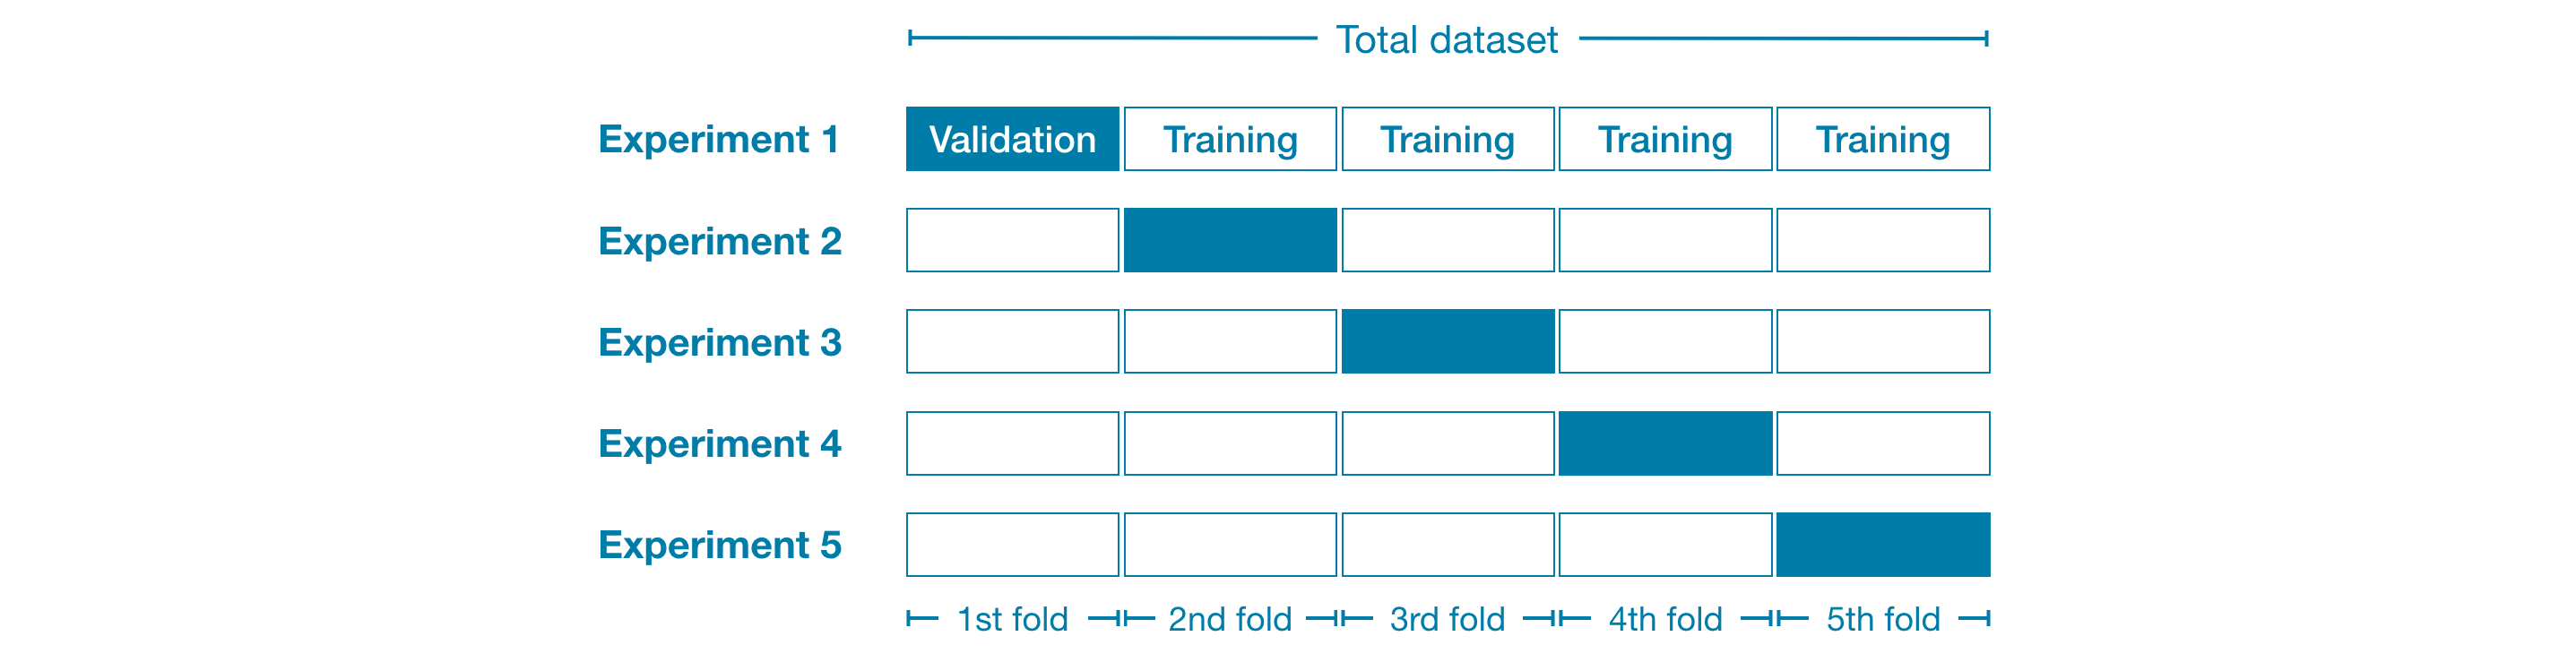

Ensuite, nous exécutons une expérience pour chaque pli :

- Dans l'expérience 1, nous utilisons le premier pli comme ensemble de validation (ou d'exclusion) et tout le reste comme données d'apprentissage. Cela nous donne une mesure de la qualité du modèle basée sur un ensemble de retenue de 20%.
- Dans l'expérience 2, nous conservons les données du deuxième pli (et utilisons tout sauf le deuxième pli pour entraîner le modèle). L'ensemble retenu est ensuite utilisé pour obtenir une deuxième estimation de la qualité du modèle.
- Nous répétons ce processus, en utilisant chaque pli une fois comme ensemble restant. En mettant cela ensemble, 100% des données sont utilisées comme retenues à un moment donné, et nous nous retrouvons avec une mesure de la qualité du modèle basée sur toutes les lignes de l'ensemble de données (même si nous n'utilisons pas toutes les lignes simultanément).

In [ ]:
from sklearn.model_selection import cross_val_score

def eval_cross_validation(X, y, max_leaf_nodes):    
    """Return le score moyen de la cross-validation de l'arbre de décision
    Keyword argument:
    max_leaf_nodes -- le nombre maximum de feuilles de l'arbre
    """

    # Compléter ces lignes ci-dessous pour renvoyé le score moyen de la cross-validation
    model = DecisionTreeRegressor(max_leaf_nodes=..., random_state=0)
    scores = -1 * cross_val_score( ...
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    return ...

score = eval_cross_validation(X, y, 50)
print("Average MAE score:", score)

tp2.step5.check(score)
# tp2.step5.hint()
# tp2.step5.solution()

In [ ]:
import numpy as np

results = []
max_leaf_nodes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, 90, 100 ]
for i in max_leaf_nodes:
    # Compléter cette boucle pour calculer les erreurs pour chaque valeur de max_leaf_nodes
    ...

print (np.mean(results))

tp2.step6.check(results)
# tp2.step6.hint()
# tp2.step6.solution()

import matplotlib.pyplot as plt
plt.plot(max_leaf_nodes,results,label="val_error")
plt.legend()
plt.show()

Trouver la valeur qui donne les scores MAE les plus bas :

In [12]:
best_leafs = max_leaf_nodes[np.argmin(results)]
print("Best leafs number: ", best_leafs)
print("Best MAE: ", np.min(results))

Best leafs number:  50
Best MAE:  25764.457771240024


Notre meilleure modele est celui qui a la plus petite moyenne des MAE.

In [13]:
best_model = DecisionTreeRegressor(max_leaf_nodes=best_leafs, random_state=0)
best_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=50, random_state=0)

### Quand utiliser la validation croisée ?
La validation croisée donne une mesure plus précise de la qualité du modèle, ce qui est particulièrement important si vous prenez de nombreuses décisions de modélisation. Cependant, son exécution peut prendre plus de temps, car elle estime plusieurs modèles (un pour chaque pli).

Alors, compte tenu de ces compromis, quand devriez-vous utiliser chaque approche ?

Pour les petits ensembles de données, où la charge de calcul supplémentaire n'est pas un gros problème, vous devez exécuter une validation croisée.
Pour les ensembles de données plus volumineux, un seul ensemble de validation suffit. Votre code s'exécutera plus rapidement et vous disposerez peut-être de suffisamment de données pour qu'il soit inutile d'en réutiliser certaines pour les conserver.
Il n'y a pas de seuil simple pour ce qui constitue un ensemble de données volumineux ou petit. Mais si votre modèle prend 10 minutes ou moins à s'exécuter, cela vaut probablement la peine de passer à la validation croisée.

Vous pouvez également exécuter une validation croisée et voir si les scores de chaque expérience semblent proches. Si chaque expérience donne les mêmes résultats, un seul ensemble de validation est probablement suffisant.